https://ftmscan.com/address/0x0DEC85e74A92c52b7F708c4B10207D9560CEFaf0#readContract

# notes on vault contract
**totalSupply**: 
- supply of vault shares
- incremented when `addr` calls .deposit, shares are minted
- decremented when `addr` calls .withdraw, shares are burned
**totalDebt**:
- decremented in .withdraw
**totalAssets**:
- assets in control of vault, 
    - loaned to strategy
    - held in vault
- totalAssets=token.balance(self)+totalDebt

# data collection script

In [1]:
from locallib import *
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%autoreload

current block 30776093


# vault level analysis

In [2]:
asset_name = 'yfi'
assets = np.load('data/yearn_%s_assets.npy'%asset_name,allow_pickle=True)
debt = np.load('data/yearn_%s_debt.npy'%asset_name,allow_pickle=True)
supply = np.load('data/yearn_%s_supply.npy'%asset_name,allow_pickle=True)
pps = np.load('data/yearn_%s_pricepershare.npy'%asset_name,allow_pickle=True)

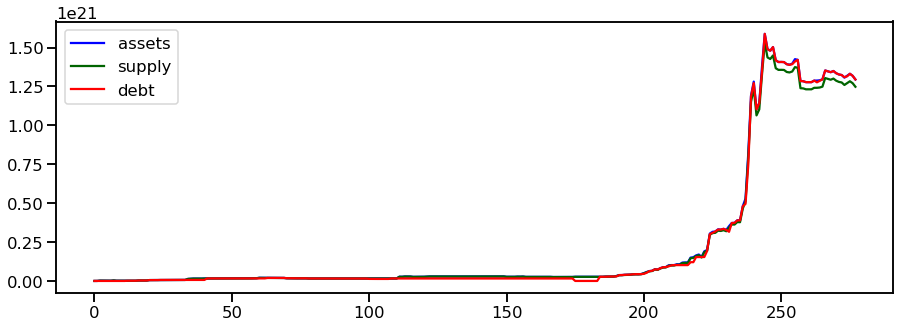

In [3]:
plt.subplots(1,1,figsize=(15,5))
ax = plt.gca()
ax.plot(assets,c='b',label='assets')
ax.plot(supply,c='darkgreen',label='supply')
ax.plot(debt,c='r',label='debt')
plt.legend()

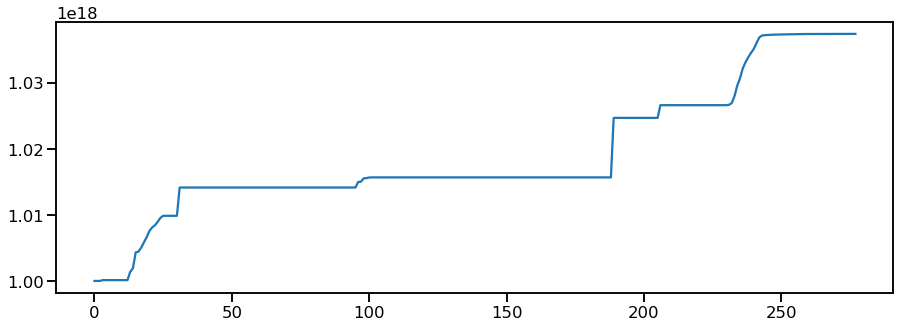

In [4]:
plt.subplots(1,1,figsize=(15,5))
ax = plt.gca()
ax.plot(pps)

(4.0, 6.0)

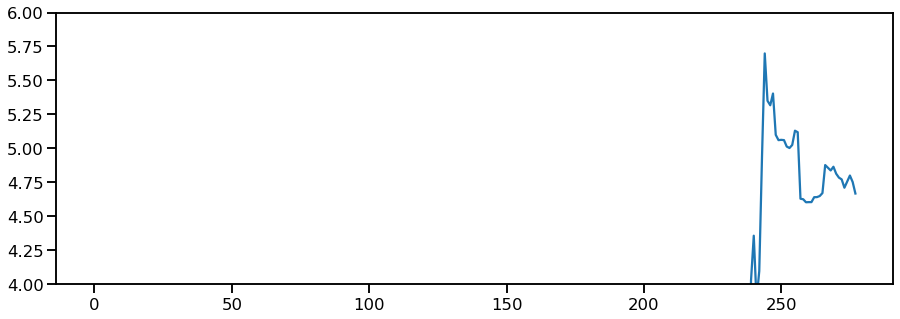

In [5]:
plt.subplots(1,1,figsize=(15,5))
ax = plt.gca()
ax.plot((assets[:len(supply)]-supply)/10**19)
ax.axhline(0,c='k')
ax.set_ylim(4,6)


# strat level analysis

In [6]:
# yearn vault helper: get address of strats in vault
strat_addresses = lambda c : [c.functions.withdrawalQueue(i).call() for i in range(20)]
## 20 addreses of strats
# adr = strat_addresses(get_vault(yearn_vault_addr['eth']))

In [7]:
def get_det_ratios(vault,nstrats=2):
    """ 
    call to contract
    CURRENT - modify to time method
    det ratio of vault contract
    return list of debt ratio
        first elem is unused?
    debt_ratio = ** 
    """
    # total debt ratio
    total_dr = vault.functions.debtRatio().call()
    # debt ratio per strategy
    # debt ratio
    drL = [10000-total_dr] 
    # iterate through stats
    addrL = strat_addresses(vault)
    for si in range(nstrats):
        strat_addr = strat_addresses(vault)[si]
        dr = vault.functions.strategies(strat_addr).call()[2]
        drL.append(dr)
    print('debt ratios. unused in vault, per strat' )
    return np.array(drL)/100

# change: to plot per strat overtime
get_det_ratios(get_contract(yearn_vault_addr['yfi']),nstrats=1)

NameError: name 'yearn_vault_addr' is not defined

# DEPR

In [ ]:
## loop over vaults, pie plot strat dr
# D = {}
# for name,addr in vault_addr.items():
#     vault = get_vault(vault_addr[name])
#     D[name] = get_det_ratios(vault,max_nstr=3)

# f,axar = plt.subplots(4,4,figsize=(10,10)); axar=axar.reshape(-1)
# for idx,name in enumerate(vault_addr.keys()):
#     ax=axar[idx]
#     ax.set_title(name)
#     drL = D[name]
#     ax.pie(drL,explode=[.1]+(len(drL)-1)*[0])
# plt.savefig('debt_ratio_pie')